# Présentation générale

À l'issu de ces travaux, vous devriez être capables d'utiliser des bibliothèques scientifiques pour faire de la modélisation en python.

Ces exercices de programmation sont divisés en trois travaux pratiques:
 1. Calcul de $\pi$ par une méthode stochastique (1 heure) 
 1. Calcul d'intégrales en utilisant les bibliothèques numpy et scipy (1 heure)
 1. Application des méthodes précédentes à la théorie des orbitales moléculaires en chimie (7 heures)
 

# TP : Estimation de $\pi$ par une méthode stochastique (Monte-Carlo)

## Objectifs pédagogiques
- Introduire la méthode Monte-Carlo pour résoudre des problèmes numériques.
- Comprendre le lien entre probabilités et géométrie.
- Illustrer comment une simulation numérique peut estimer une constante mathématique.
- Étudier la convergence stochastique et les facteurs influençant la précision.

---

## Introduction

La valeur de $\pi$ peut être estimée de manière probabiliste en utilisant une méthode simple basée sur la géométrie. Le principe repose sur le rapport des aires entre un carré et un cercle inscrit. Ce TP explore cette approche à travers une simulation numérique.

**Idée principale** :
- On simule des points aléatoires dans un carré et on calcule la proportion de ces points qui tombent à l'intérieur d'un disque inscrit.
- Ce rapport est directement lié à la valeur de $\pi$.

---

## Méthode

### **1. Concept géométrique**
- Considérons un carré de côté $2r$, centré à l'origine.
- Un cercle de rayon $r$ est inscrit dans ce carré.
- Les aires respectives sont :
  - Carré : $4r^2$,
  - Cercle : $\pi r^2$.

Le rapport entre l'aire du cercle et celle du carré est donné par :
$$
\frac{\text{Aire du cercle}}{\text{Aire du carré}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}.
$$

Ainsi, si nous connaissons ce rapport, nous pouvons estimer $\pi$ via :
$$
\pi \approx 4 \times \text{(Proportion de points dans le cercle)}.
$$

---

### **2. Simulation stochastique**
- On génère $N$ points aléatoires $(x, y)$ uniformément dans le carré.
- Pour chaque point, on vérifie s'il est à l'intérieur du cercle en testant la condition :
$$
x^2 + y^2 \leq r^2.
$$
- La proportion des points à l'intérieur du cercle, notée $P$, est approximée par :
$$
P = \frac{\text{Nombre de points dans le cercle}}{\text{Nombre total de points}}.
$$
- La relation avec $\pi$ est donnée par :
$$
\pi \approx 4P.
$$

---

## Déroulement du TP

### **Étape 1 : Initialisation**
- Fixer le rayon du cercle à $r = 1$ et considérer un carré de côté $2$.
- Générer $N$ points aléatoires $(x, y)$ uniformément répartis dans le carré.

### **Étape 2 : Calcul**
- Déterminer combien de points $(x, y)$ satisfont $x^2 + y^2 \leq 1$.
- Calculer la proportion $P$ des points dans le cercle.
- Estimer $\pi$ avec la formule $\pi \approx 4P$.

### **Étape 3 : Visualisation**
- Représenter graphiquement les points dans le carré :
  - Points à l’intérieur du cercle en une couleur.
  - Points à l’extérieur du cercle en une autre couleur.
- Étudier l'évolution de la précision en fonction du nombre de points $N$.

---

## Points à discuter
1. **Convergence** :
   - Comment la précision dépend-elle du nombre de points $N$ ?
   - Introduire la loi des grands nombres.
2. **Erreurs** :
   - Pourquoi les estimations fluctuent-elles pour de petites valeurs de $N$ ?
3. **Applications** :
   - Où la méthode Monte-Carlo est-elle utilisée dans des contextes réels ?

---

## Extensions possibles
- Étudier des variantes avec des régions d'intégration différentes (ellipses, polygones).
- Comparer la méthode Monte-Carlo avec des méthodes numériques classiques pour le calcul de $\pi$.
- Étendre la simulation à des dimensions supérieures (ex. : estimation du volume d'une sphère).

---

## Visualisation suggérée
- **Graphique des points simulés** :
  - Représenter le carré et le disque inscrit.
  - Colorer les points pour distinguer ceux dans le cercle et ceux en dehors.
- **Évolution de $\pi$** :
  - Tracer la valeur estimée de $\pi$ en fonction du nombre de points $N$.
  - Ajouter une ligne horizontale correspondant à la valeur exacte de $\pi$ pour visualiser l'erreur.

---

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les paramètres
N = 100000  # Nombre de points
radius = 1.0

# Générer des points aléatoires dans le carré de côté 2*radius
x = np.random.uniform(-radius, radius, N)
y = np.random.uniform(-radius, radius, N)

# Calculer la distance au centre et déterminer si les points sont dans le cercle
distances = x**2 + y**2
inside_circle = distances <= radius**2

# Calculer la proportion de points dans le cercle
P = np.sum(inside_circle) / N
pi_estimate = 4 * P

# Afficher le résultat
print(f"Estimation de π avec N={N} points : {pi_estimate:.8f}")

Estimation de π avec N=100000 points : 3.13620000


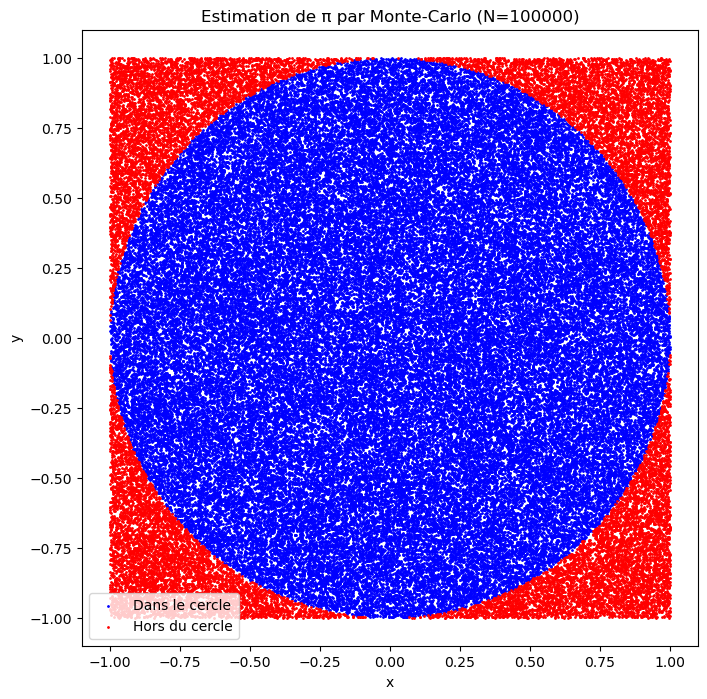

In [13]:
# Visualisation des points
plt.figure(figsize=(8, 8))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label="Dans le cercle")
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label="Hors du cercle")
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"Estimation de π par Monte-Carlo (N={N})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

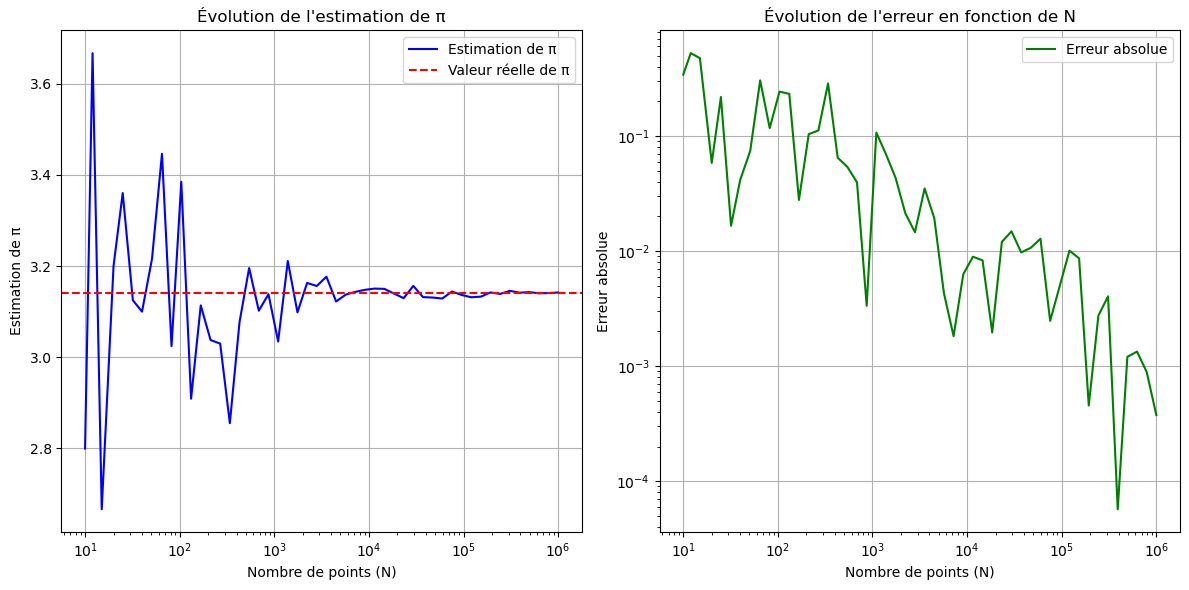

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour estimer π avec N points
def estimate_pi(N):
    x = np.random.uniform(-1, 1, N)
    y = np.random.uniform(-1, 1, N)
    distances = x**2 + y**2
    inside_circle = np.sum(distances <= 1)
    return 4 * inside_circle / N

# Liste de différents nombres de points N
N_values = np.logspace(1, 6, num=50, dtype=int)  # De 10 à 10^6 points
pi_estimates = []
errors = []

# Estimation de π pour chaque N
for N in N_values:
    pi_approx = estimate_pi(N)
    pi_estimates.append(pi_approx)
    errors.append(abs(pi_approx - np.pi))  # Erreur absolue par rapport à la vraie valeur

# Tracé des résultats
plt.figure(figsize=(12, 6))

# Graphique de l'estimation de π
plt.subplot(1, 2, 1)
plt.plot(N_values, pi_estimates, label="Estimation de π", color="blue")
plt.axhline(np.pi, color="red", linestyle="--", label="Valeur réelle de π")
plt.xscale("log")
plt.xlabel("Nombre de points (N)")
plt.ylabel("Estimation de π")
plt.title("Évolution de l'estimation de π")
plt.legend()
plt.grid()

# Graphique de l'erreur absolue
plt.subplot(1, 2, 2)
plt.plot(N_values, errors, label="Erreur absolue", color="green")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre de points (N)")
plt.ylabel("Erreur absolue")
plt.title("Évolution de l'erreur en fonction de N")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# TP : Tracé de courbes, calcul d'intégrales et visualisation de l'aire sous la courbe

## Objectifs pédagogiques
- Se familiariser avec le tracé de courbes 1D en Python.
- Comprendre et calculer des intégrales définies en 1D.
- Apprendre à représenter graphiquement l’aire sous une courbe pour illustrer une intégrale.

---

## Introduction

Ce TP a pour but de travailler sur la représentation graphique de fonctions mathématiques et leur analyse numérique à travers le calcul d'intégrales définies. L'intégrale définie d'une fonction sur un intervalle correspond à l'aire sous la courbe entre deux points. Ce concept sera illustré à l’aide d'outils Python.

---

## Méthode

### Étape 1 : Tracé de courbes 1D
1. **Définition des fonctions** :
   - Étudier des fonctions simples comme $f(x) = x^2$, $f(x) = \sin(x)$, ou $f(x) = e^{-x^2}$.
2. **Tracé graphique** :
   - Utiliser la bibliothèque **Matplotlib** pour représenter ces fonctions sur un intervalle donné.
   - Ajouter des éléments comme des titres, des légendes, et des étiquettes sur les axes.

---

### Étape 2 : Calcul d'intégrales définies
1. **Concept** :
   - L'intégrale définie $\int_a^b f(x) \, dx$ représente l’aire sous la courbe $f(x)$ entre les bornes $x = a$ et $x = b$.
   - Utiliser **`scipy.integrate.quad`** pour calculer cette intégrale de manière numérique.
2. **Exemples** :
   - Calculer $\int_0^1 x^2 \, dx$.
   - Calculer $\int_0^\pi \sin(x) \, dx$.
   - Comparer les résultats numériques avec les valeurs analytiques (si disponibles).

---

### Étape 3 : Visualisation de l’aire sous la courbe
1. **Superposition de l’aire** :
   - Utiliser Matplotlib pour afficher la courbe de $f(x)$.
   - Représenter l’aire sous la courbe sur l’intervalle d'intégration à l’aide de la fonction **`fill_between`**.
2. **Personnalisation du graphique** :
   - Ajouter une légende indiquant l’intégrale calculée.
   - Mettre en évidence l'intervalle d'intégration avec des traits verticaux.

---

## Déroulement du TP

### Activité 1 : Tracé simple
- Définir et tracer la courbe de $f(x) = x^2$ sur l’intervalle $[0, 2]$.

### Activité 2 : Calcul d’intégrales
- Calculer l’intégrale de $f(x) = x^2$ sur $[0, 2]$.
- Comparer le résultat avec la valeur analytique.

### Activité 3 : Visualisation
- Afficher la courbe de $f(x)$ sur $[0, 2]$.
- Mettre en évidence l’aire sous la courbe en remplissant la région correspondante.

### Activité 4 : Étendre à d'autres fonctions
- Réaliser les mêmes étapes pour $f(x) = \sin(x)$ sur $[0, \pi]$ et $f(x) = e^{-x^2}$ sur $[-2, 2]$.

---

## Exemple de visualisation attendue
1. Une courbe représentant $f(x)$ sur un intervalle donné.
2. Une région colorée sous la courbe indiquant l’aire correspondant à l'intégrale.
3. Une légende affichant la valeur de l’intégrale calculée.

---

## Points de discussion
1. **Précision des méthodes numériques** :
   - Comment les méthodes numériques se comparent-elles aux solutions analytiques ?
   - Quels facteurs influencent la précision (par exemple, la discrétisation) ?
2. **Représentation graphique** :
   - Comment améliorer la clarté et l’esthétique des graphiques ?
   - Pourquoi est-il important de visualiser l'aire sous la courbe pour interpréter une intégrale ?

---

## Extensions possibles
- Étudier des fonctions à singularité, par exemple $f(x) = \frac{1}{x}$ sur $[1, 2]$.
- Travailler avec des limites infinies, comme $\int_0^\infty e^{-x} \, dx$.
- Appliquer ces concepts pour modéliser une application physique ou économique.

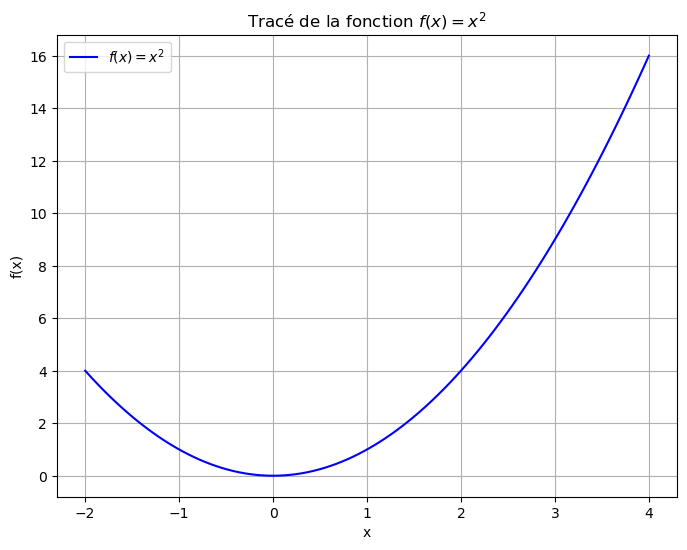

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction
def f(x):
    return x**2

# Générer des points pour x
x = np.linspace(-2, 4, 100)

# Tracer la courbe
plt.figure(figsize=(8, 6))
plt.plot(x, f(x), label=r"$f(x) = x^2$", color="blue")
plt.title("Tracé de la fonction $f(x) = x^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

In [5]:
from scipy.integrate import quad

# Calculer l'intégrale définie
a, b = 0, 2  # Bornes d'intégration
result, _ = quad(f, a, b)

# Afficher le résultat
print(f"L'intégrale de f(x) = x^2 sur [{a}, {b}] est : {result}")


L'intégrale de f(x) = x^2 sur [0, 2] est : 2.666666666666667


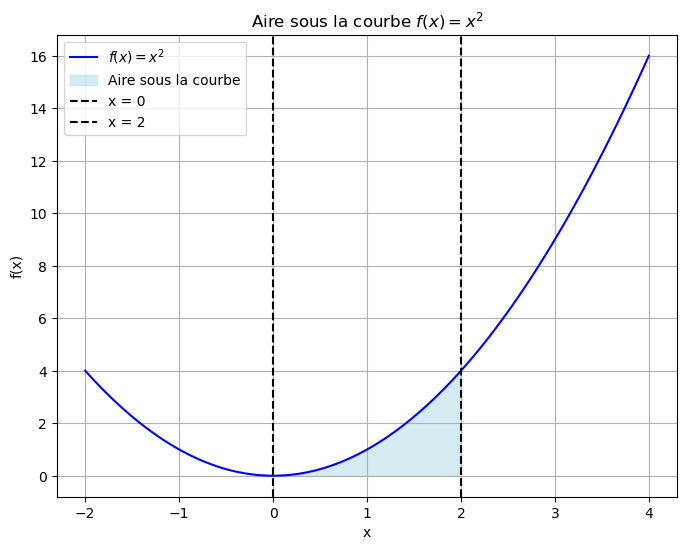

In [6]:
# Tracer la courbe et remplir l'aire sous la courbe
plt.figure(figsize=(8, 6))
plt.plot(x, f(x), label=r"$f(x) = x^2$", color="blue")
plt.fill_between(x, f(x), where=(x >= a) & (x <= b), color="lightblue", alpha=0.5, label="Aire sous la courbe")
plt.axvline(a, color="black", linestyle="--", label=f"x = {a}")
plt.axvline(b, color="black", linestyle="--", label=f"x = {b}")
plt.title("Aire sous la courbe $f(x) = x^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


L'intégrale de g(x) = sin(x) sur [0, 3.141592653589793] est : 2.0


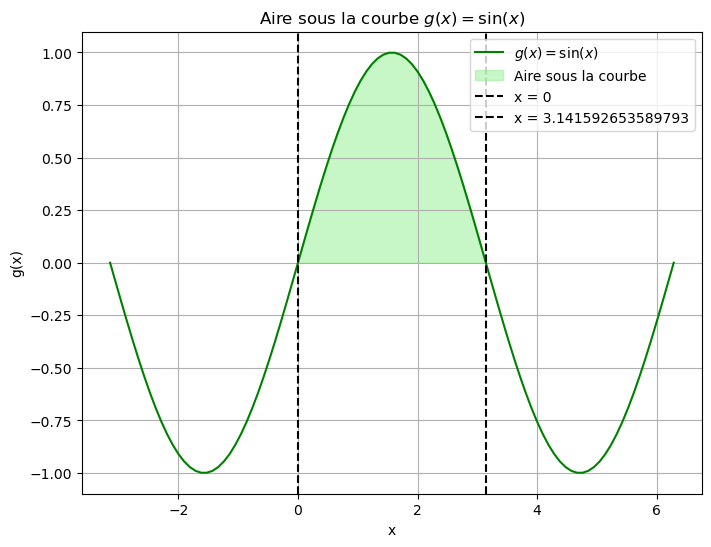

In [7]:
# Définir une nouvelle fonction
def g(x):
    return np.sin(x)

# Bornes
a0, b0 = -np.pi, 2*np.pi
a, b = 0, np.pi

# Calculer l'intégrale
result, _ = quad(g, a, b)
print(f"L'intégrale de g(x) = sin(x) sur [{a}, {b}] est : {result}")

# Visualisation
x = np.linspace(a0, b0, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, g(x), label=r"$g(x) = \sin(x)$", color="green")
plt.fill_between(x, g(x), where=(x >= a) & (x <= b), color="lightgreen", alpha=0.5, label="Aire sous la courbe")
plt.axvline(a, color="black", linestyle="--", label=f"x = {a}")
plt.axvline(b, color="black", linestyle="--", label=f"x = {b}")
plt.title("Aire sous la courbe $g(x) = \sin(x)$")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid()
plt.show()


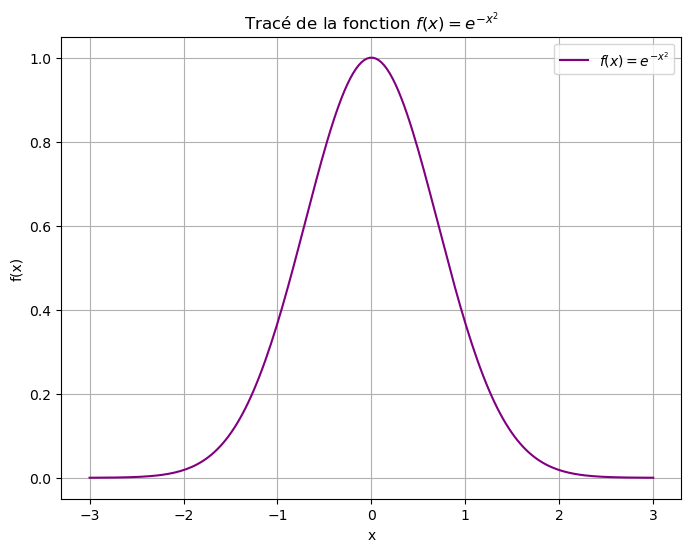

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction
def h(x):
    return np.exp(-x**2)

# Générer des points pour x
a0, b0 = -3, 3
x = np.linspace(a0, b0, 200)

# Tracer la courbe
plt.figure(figsize=(8, 6))
plt.plot(x, h(x), label=r"$f(x) = e^{-x^2}$", color="purple")
plt.title("Tracé de la fonction $f(x) = e^{-x^2}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


In [9]:
from scipy.integrate import quad

# Calculer l'intégrale définie
a, b = -1, 2  # Bornes d'intégration
result, _ = quad(h, a, b)

# Afficher le résultat
print(f"L'intégrale de f(x) = e^(-x^2) sur [{a}, {b}] est : {result}")


L'intégrale de f(x) = e^(-x^2) sur [-1, 2] est : 1.6289055235748486


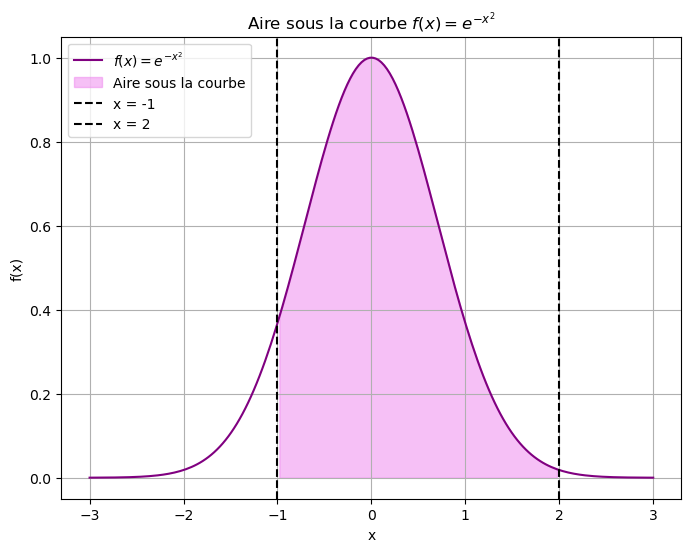

In [10]:
# Tracer la courbe et remplir l'aire sous la courbe
plt.figure(figsize=(8, 6))
plt.plot(x, h(x), label=r"$f(x) = e^{-x^2}$", color="purple")
plt.fill_between(x, h(x), where=(x >= a) & (x <= b), color="violet", alpha=0.5, label="Aire sous la courbe")
plt.axvline(a, color="black", linestyle="--", label=f"x = {a}")
plt.axvline(b, color="black", linestyle="--", label=f"x = {b}")
plt.title("Aire sous la courbe $f(x) = e^{-x^2}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()
